In [79]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [80]:
accuracies = [[0.35, 0.65, 0.70, 0.56, 0.66],
              [0.89, 0.47, 0.41, 0.45, 0.62, 0.37, 0.45],
              [0.70, 0.29, 0.36, 0.92, 0.54, 0.55, 0.52, 0.44, 0.68, 0.61],
              [0.53, 0.36, 0.50, 0.32, 0.35, 0.56, 0.52, 0.86, 0.72, 0.31, 0.69, 0.85, 0.36],
              [0.48, 0.94, 0.53, 0.70, 0.43, 0.58, 0.30, 0.88, 0.62 , 0.57, 0.38, 0.49, 0.39, 0.55, 0.29]]

test = [10,100,999,9999]

B = [5,10,15]

[0.7, 0.66, 0.65, 0.56, 0.35]


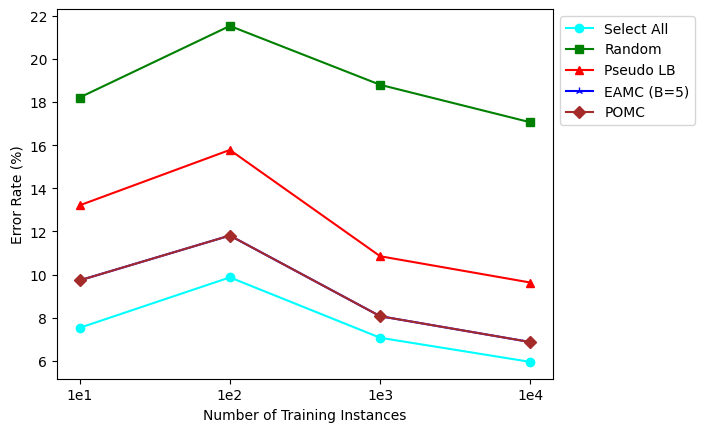

[0.89, 0.62, 0.47, 0.45, 0.45, 0.41, 0.37]


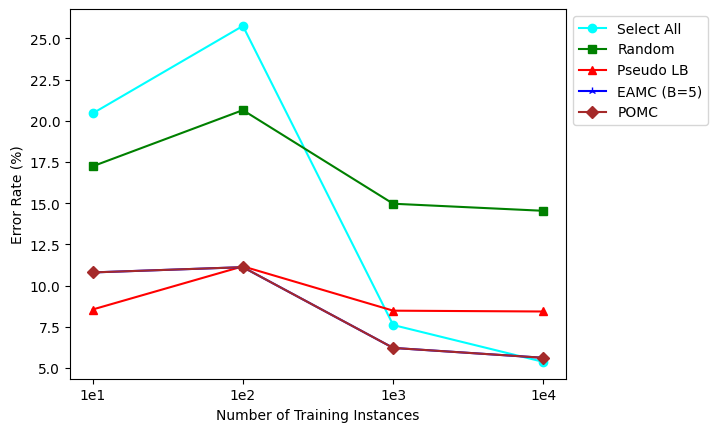

[0.92, 0.7, 0.68, 0.61, 0.55, 0.54, 0.52, 0.44, 0.36, 0.29]


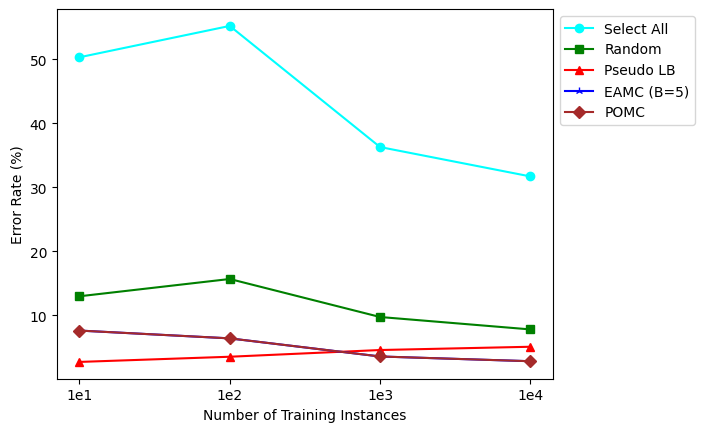

[0.86, 0.85, 0.72, 0.69, 0.56, 0.53, 0.52, 0.5, 0.36, 0.36, 0.35, 0.32, 0.31]


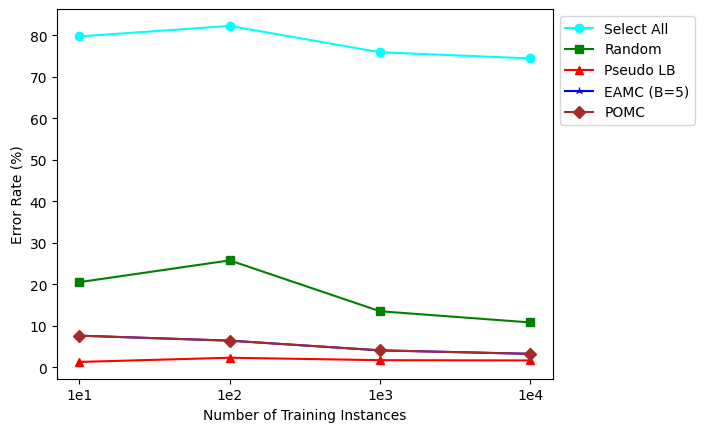

[0.94, 0.88, 0.7, 0.62, 0.58, 0.57, 0.55, 0.53, 0.49, 0.48, 0.43, 0.39, 0.38, 0.3, 0.29]


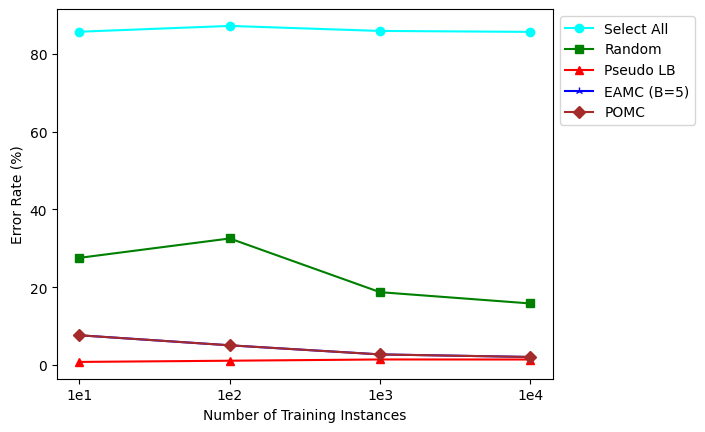

In [81]:
for a in accuracies:
    selectall = []
    random = []
    pseudolb = []
    eamc5 = []
    eamc10 = []
    eamc15 = []
    pomc = []
    a.sort()
    a.reverse()
    for t in test:
        for b in B:
            csv_file_path = f'./output/eamc{b}/cnn_data_accuracy_{a}_{t}_0.csv'
            with open(csv_file_path, 'r') as file:
                csv_reader = csv.reader(file)
                next(csv_reader)
                for row in csv_reader:
                    if b==5:
                        selectall.append(100-(float(row[5])*100))
                        random.append(100-(float(row[6])*100))
                        pseudolb.append(100-(float(row[8])*100))
                        pomc.append(100-(float(row[9])*100))
                        eamc5.append(100-(float(row[10])*100))
                    elif b==10:
                        eamc10.append(100-(float(row[2])*100))
                    else:
                        eamc15.append(100-(float(row[2])*100))

    x = ['1e1','1e2','1e3','1e4'] 
    print(a)
    
    plt.plot(x, selectall, label='Select All', marker='o',color='cyan')
    plt.plot(x, random, label='Random', marker='s',color='green')
    plt.plot(x, pseudolb, label='Pseudo LB', marker='^',color='red')
    plt.plot(x, eamc5, label='EAMC (B=5)', marker='2',color='blue')
    plt.plot(x, eamc5, label='POMC', marker='D',color='brown')
    # plt.plot(x, eamc10, label='EAMC (B=10)', marker='p',color='lightsteelblue')
    # plt.plot(x, eamc15, label='EAMC (B=15)', marker='*',color='steelblue')
    plt.xlabel('Number of Training Instances')
    plt.ylabel('Error Rate (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    

In [82]:
test = [0.0001,0.9,0.99,0.999]
test.reverse()

[0.7, 0.66, 0.65, 0.56, 0.35]


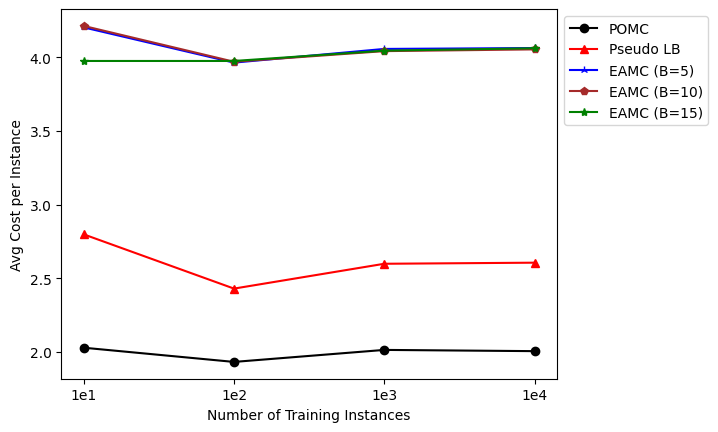

[0.89, 0.62, 0.47, 0.45, 0.45, 0.41, 0.37]


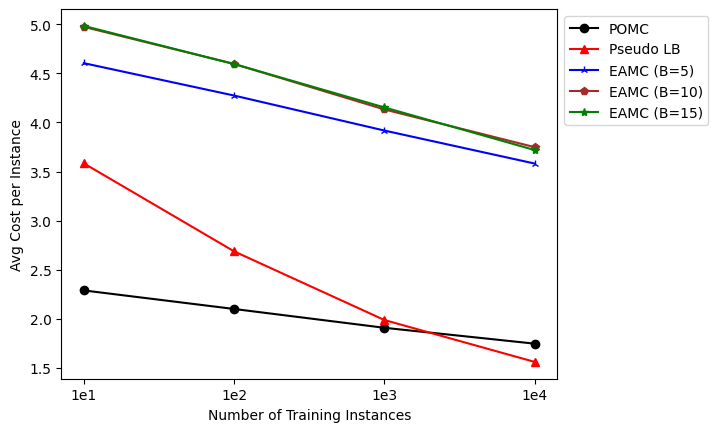

[0.92, 0.7, 0.68, 0.61, 0.55, 0.54, 0.52, 0.44, 0.36, 0.29]


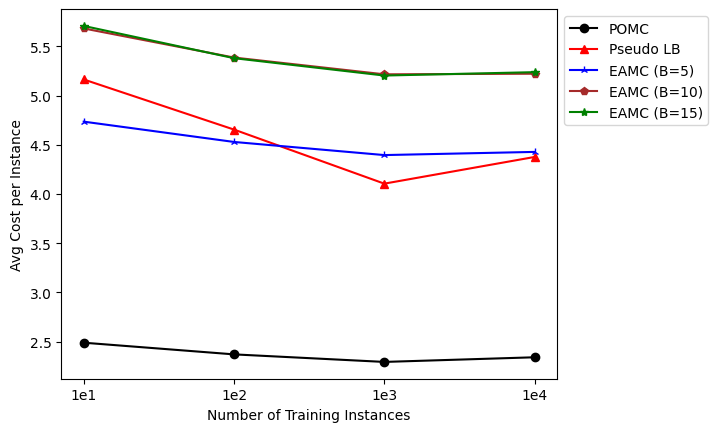

[0.86, 0.85, 0.72, 0.69, 0.56, 0.53, 0.52, 0.5, 0.36, 0.36, 0.35, 0.32, 0.31]


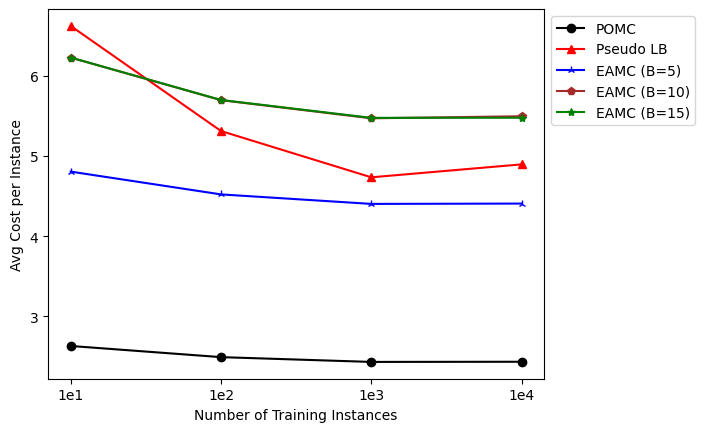

[0.94, 0.88, 0.7, 0.62, 0.58, 0.57, 0.55, 0.53, 0.49, 0.48, 0.43, 0.39, 0.38, 0.3, 0.29]


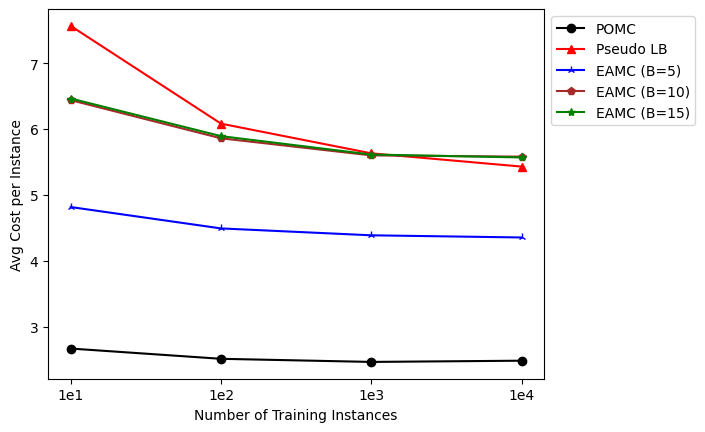

In [83]:
for a in accuracies:
    selectall = [len(a)]*4
    pseudolb = []
    pomc = []
    eamc5 = []
    eamc10 = []
    eamc15 = []
    a.sort()
    a.reverse()
    for t in test:
        csv_file_path = f'./subset/{a}_{t}_subset_eamc5.csv'
        sum = 0
        with open(csv_file_path, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                sum+=len(row)
        eamc5.append(sum/10000.0)

        sum = 0
        csv_file_path = f'./subset/{a}_{t}_subset_eamc10.csv'
        with open(csv_file_path, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                sum+=len(row)
        eamc10.append(sum/10000.0)

        sum = 0
        csv_file_path = f'./subset/{a}_{t}_subset_eamc15.csv'
        with open(csv_file_path, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                sum+=len(row)
        eamc15.append(sum/10000.0)

        sum = 0
        csv_file_path = f'./subset/{a}_{t}_subset_pomc.csv'
        with open(csv_file_path, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                sum+=len(row)
        pomc.append(sum/10000.0)

        sum = 0
        csv_file_path = f'./subset/{a}_{t}_subset_pseudolb.csv'
        with open(csv_file_path, 'r') as file:
            csv_reader = csv.reader(file)
            for row in csv_reader:
                sum+=len(row)
        pseudolb.append(sum/10000.0)

    x = ['1e1','1e2','1e3','1e4'] 
    print(a)
    # print(eamc5,selectall,pseudolb,eamc10,eamc15)
    
    plt.plot(x, pomc, label='POMC', marker='o',color='black')
    plt.plot(x, pseudolb, label='Pseudo LB', marker='^',color='red')
    plt.plot(x, eamc5, label='EAMC (B=5)', marker='2',color='blue')
    plt.plot(x, eamc10, label='EAMC (B=10)', marker='p',color='brown')
    plt.plot(x, eamc15, label='EAMC (B=15)', marker='*',color='green')
    plt.xlabel('Number of Training Instances')
    plt.ylabel('Avg Cost per Instance')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    

In [58]:
csv_file_path = f'./subset/[0.7, 0.66, 0.65, 0.56, 0.35]_0.0001_subset_eamc5.csv'
with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)
    sum = 0
    for row in csv_reader:
        sum+=len(row)
    print(sum/10000.0)

4.0629
